I picked the Air Quality https://archive.ics.uci.edu/ml/datasets/Air+Quality
dataset for performing Exploratory Data Analysis.


**About the Dataset**

The Dataset contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer.



**Information about the attribute**

There are 15 attributes in total, information about the attributes are provided as follows:



0.   Date (DD/MM/YYYY)
1.   Time (HH.MM.SS)
2.   True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3.   PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4.   True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5.   True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6.   PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7.   True hourly averaged NOx concentration in ppb (reference analyzer)
8.   PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9.   True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10.  PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11.  PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12.  Temperature in Â°C
13.  Relative Humidity (%)
14.  AH Absolute Humidity






In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

ncol=list(np.arange(len(col)))

In [ ]:
# Importing the dataset and printing it's type

df = pd.read_csv("/content/sample_data/AirQualityUCI (1).csv",header=None,skiprows=1,names=col,na_filter=True,
                   na_values=-200,usecols=ncol)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df.head()

DATE      TIME  CO_GT  PT08_S1_CO  ...  PT08_S5_O3     T    RH      AH
0  3/10/2004  18:00:00    2.6      1360.0  ...      1268.0  13.6  48.9  0.7578
1  3/10/2004  19:00:00    2.0      1292.0  ...       972.0  13.3  47.7  0.7255
2  3/10/2004  20:00:00    2.2      1402.0  ...      1074.0  11.9  54.0  0.7502
3  3/10/2004  21:00:00    2.2      1376.0  ...      1203.0  11.0  60.0  0.7867
4  3/10/2004  22:00:00    1.6      1272.0  ...      1110.0  11.2  59.6  0.7888

[5 rows x 15 columns]

In [ ]:
df.tail()

DATE TIME  CO_GT  PT08_S1_CO  NMHC_GT  ...  PT08_S4_NO2  PT08_S5_O3   T  RH  AH
9466  NaN  NaN    NaN         NaN      NaN  ...          NaN         NaN NaN NaN NaN
9467  NaN  NaN    NaN         NaN      NaN  ...          NaN         NaN NaN NaN NaN
9468  NaN  NaN    NaN         NaN      NaN  ...          NaN         NaN NaN NaN NaN
9469  NaN  NaN    NaN         NaN      NaN  ...          NaN         NaN NaN NaN NaN
9470  NaN  NaN    NaN         NaN      NaN  ...          NaN         NaN NaN NaN NaN

[5 rows x 15 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          9357 non-null   object 
 1   TIME          9357 non-null   object 
 2   CO_GT         7674 non-null   float64
 3   PT08_S1_CO    8991 non-null   float64
 4   NMHC_GT       914 non-null    float64
 5   C6H6_GT       8991 non-null   float64
 6   PT08_S2_NMHC  8991 non-null   float64
 7   NOX_GT        7718 non-null   float64
 8   PT08_S3_NOX   8991 non-null   float64
 9   NO2_GT        7715 non-null   float64
 10  PT08_S4_NO2   8991 non-null   float64
 11  PT08_S5_O3    8991 non-null   float64
 12  T             8991 non-null   float64
 13  RH            8991 non-null   float64
 14  AH            8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [ ]:
# Display sum of missing value

df.isnull().sum()

DATE             114
TIME             114
CO_GT           1797
PT08_S1_CO       480
NMHC_GT         8557
C6H6_GT          480
PT08_S2_NMHC     480
NOX_GT          1753
PT08_S3_NOX      480
NO2_GT          1756
PT08_S4_NO2      480
PT08_S5_O3       480
T                480
RH               480
AH               480
dtype: int64

In [ ]:
df.describe()

CO_GT   PT08_S1_CO  ...           RH           AH
count  7674.000000  8991.000000  ...  8991.000000  8991.000000
mean      2.152750  1099.833166  ...    49.234201     1.025530
std       1.453252   217.080037  ...    17.316892     0.403813
min       0.100000   647.000000  ...     9.200000     0.184700
25%       1.100000   937.000000  ...    35.800000     0.736800
50%       1.800000  1063.000000  ...    49.600000     0.995400
75%       2.900000  1231.000000  ...    62.500000     1.313700
max      11.900000  2040.000000  ...    88.700000     2.231000

[8 rows x 13 columns]

In [ ]:
#Dropping end rows with NaN values

df.dropna(how='all',inplace=True)
#drop RH NAN rows

df.dropna(thresh=10,axis=0,inplace=True)

In [ ]:
df.isnull().sum()

DATE               0
TIME               0
CO_GT           1647
PT08_S1_CO         0
NMHC_GT         8104
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
dtype: int64

In [ ]:
# Dropping NMHC_GT since it has high amount of missing data
df.drop('NMHC_GT',axis=1,inplace=True)   

In [ ]:
df['HOUR']=df['TIME'].apply(lambda x: int(x.split(':')[0]))
df.HOUR.head()

0    18
1    19
2    20
3    21
4    22
Name: HOUR, dtype: int64

In [ ]:
# Using Datetime as index


df['DATE']=pd.to_datetime(df.DATE, format='%m/%d/%Y')

In [ ]:
df.set_index('DATE',inplace=True)

In [ ]:
df['MONTH']=df.index.month

In [ ]:
df['CO_GT']=df['CO_GT'].fillna(df.groupby(['MONTH','HOUR'])['CO_GT'].transform('mean'))
df['NOX_GT']=df['NOX_GT'].fillna(df.groupby(['MONTH','HOUR'])['NOX_GT'].transform('mean'))
df['NO2_GT']=df['NO2_GT'].fillna(df.groupby(['MONTH','HOUR'])['NO2_GT'].transform('mean'))

In [ ]:
df.head()

TIME  CO_GT  PT08_S1_CO  C6H6_GT  ...    RH      AH  HOUR  MONTH
DATE                                              ...                           
2004-03-10  18:00:00    2.6      1360.0     11.9  ...  48.9  0.7578    18      3
2004-03-10  19:00:00    2.0      1292.0      9.4  ...  47.7  0.7255    19      3
2004-03-10  20:00:00    2.2      1402.0      9.0  ...  54.0  0.7502    20      3
2004-03-10  21:00:00    2.2      1376.0      9.2  ...  60.0  0.7867    21      3
2004-03-10  22:00:00    1.6      1272.0      6.5  ...  59.6  0.7888    22      3

[5 rows x 15 columns]

In [ ]:
print('Missing value:\n',df.shape[0]-df.count() )

Missing value:
 TIME              0
CO_GT            30
PT08_S1_CO        0
C6H6_GT           0
PT08_S2_NMHC      0
NOX_GT          261
PT08_S3_NOX       0
NO2_GT          261
PT08_S4_NO2       0
PT08_S5_O3        0
T                 0
RH                0
AH                0
HOUR              0
MONTH             0
dtype: int64


In [ ]:
# Filling the missing values with the mean value


df['CO_GT']=df['CO_GT'].fillna(df.groupby(['HOUR'])['CO_GT'].transform('mean'))
df['NOX_GT']=df['NOX_GT'].fillna(df.groupby(['HOUR'])['NOX_GT'].transform('mean'))
df['NO2_GT']=df['NO2_GT'].fillna(df.groupby(['HOUR'])['NO2_GT'].transform('mean'))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


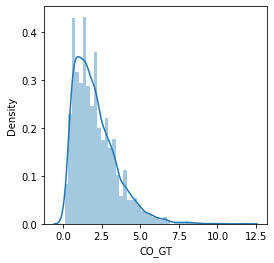

In [ ]:
# Plotting distribution of different columns
plt.figure(figsize=(4,4))
sns.distplot(df['CO_GT'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


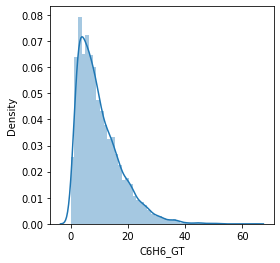

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(df['C6H6_GT'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


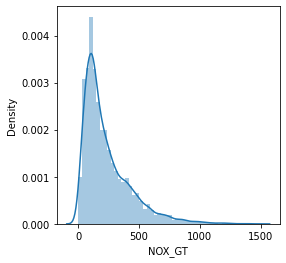

In [ ]:

plt.figure(figsize=(4,4))
sns.distplot(df['NOX_GT'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


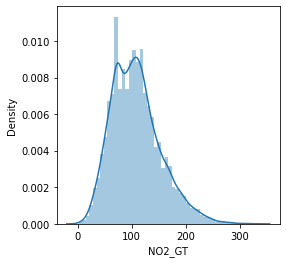

In [ ]:
plt.figure(figsize=(4,4))
sns.distplot(df['NO2_GT'])

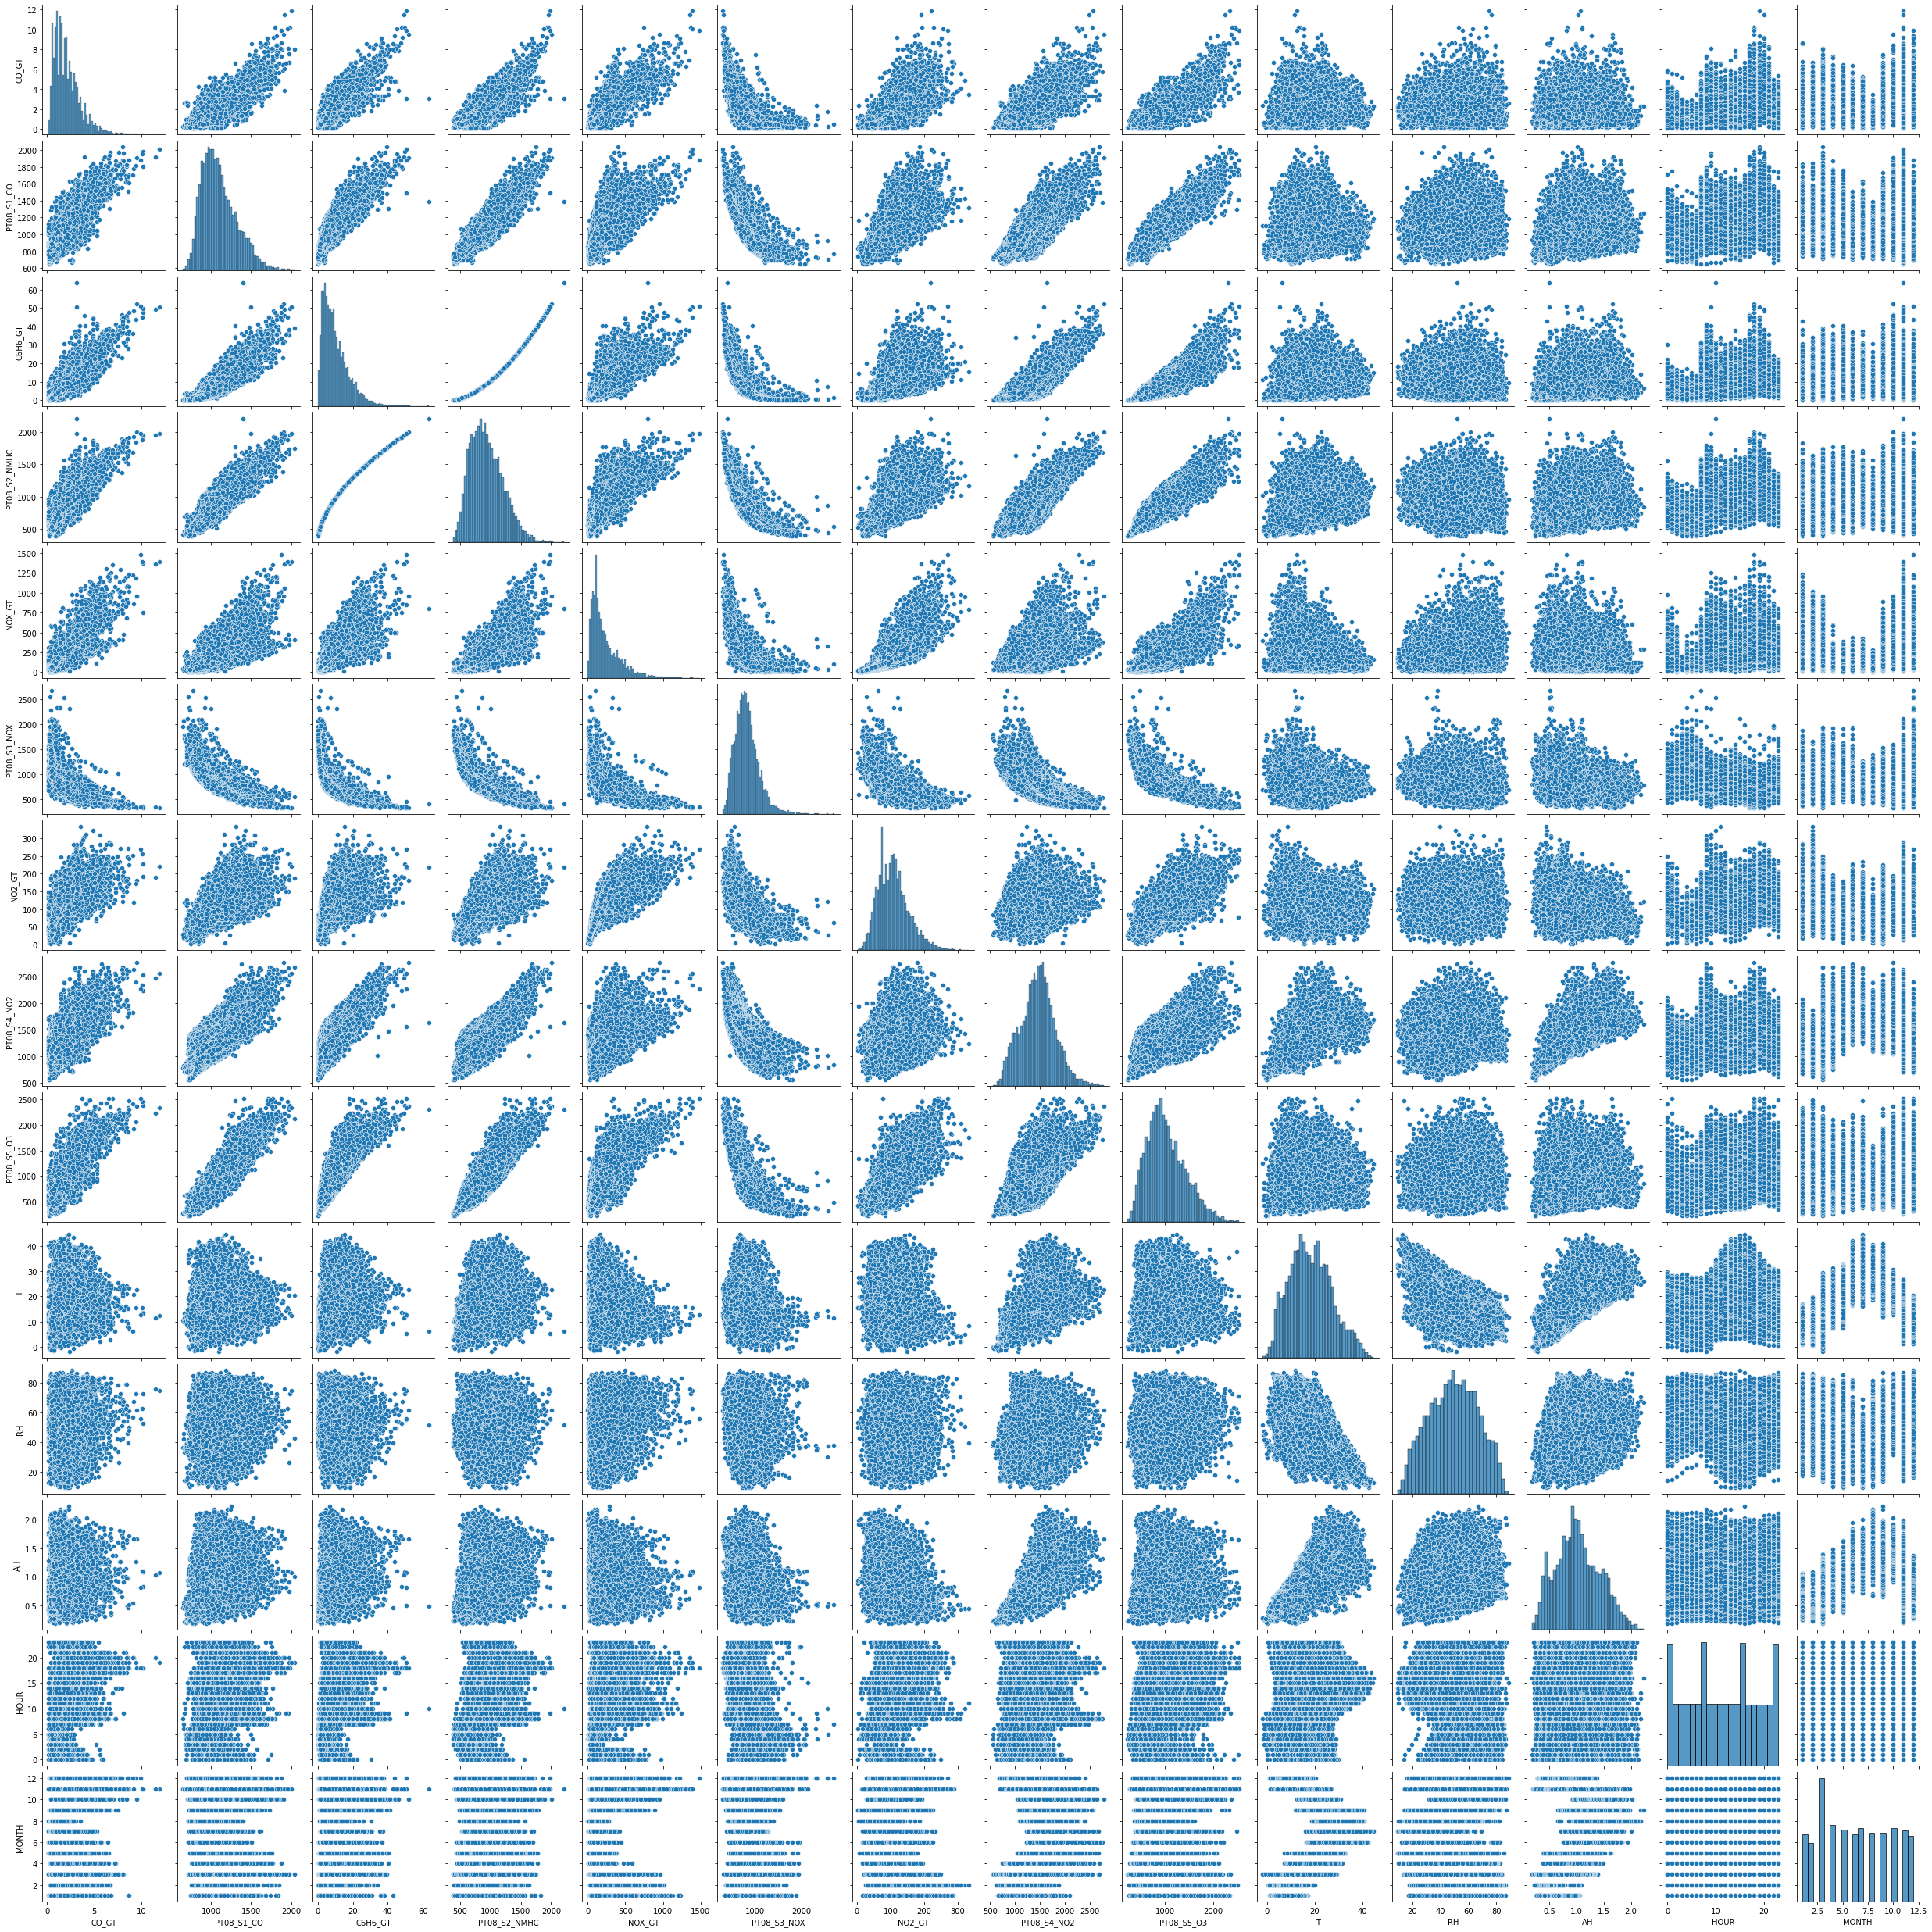

In [ ]:
# Now using seaborn pair plot to plot pair wise relationship in our dataset

sns.pairplot(df,palette="cubehelix")

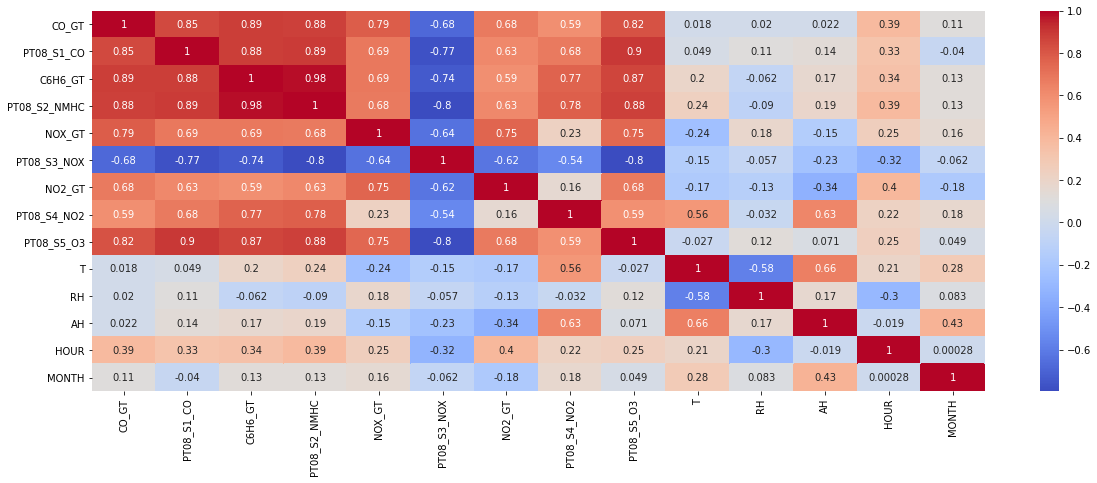

In [ ]:
# Using heatmap of seaborn to plot the correlation in our dataset
plt.figure(figsize = (20,7))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

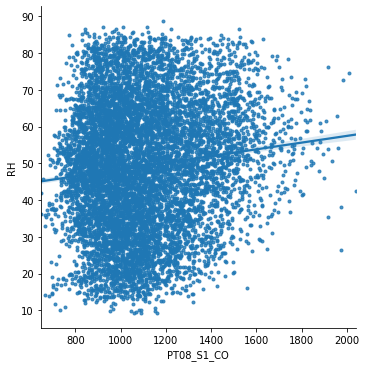

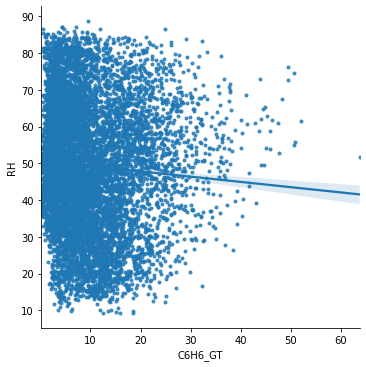

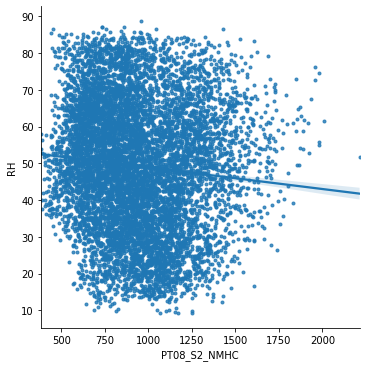

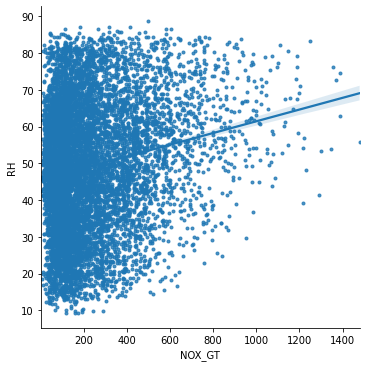

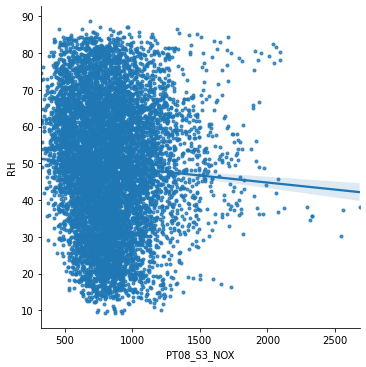

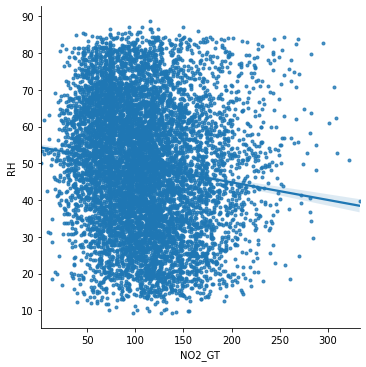

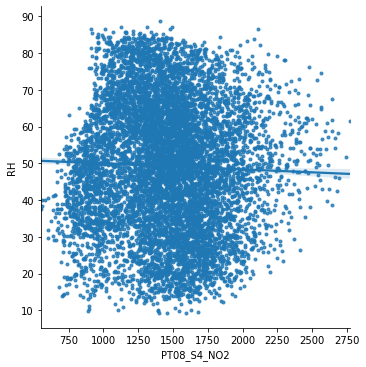

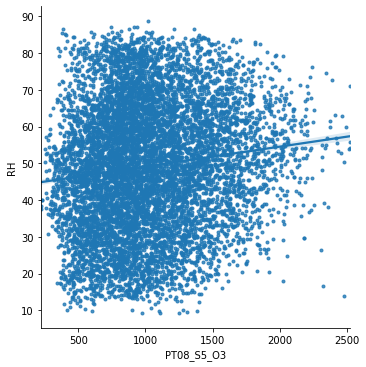

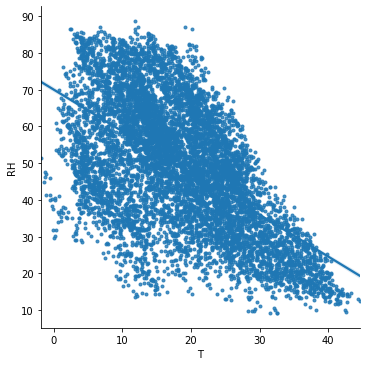

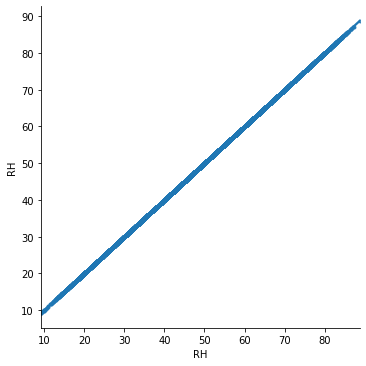

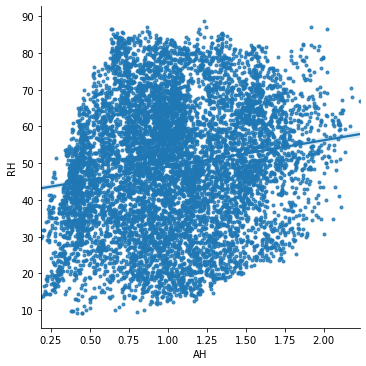

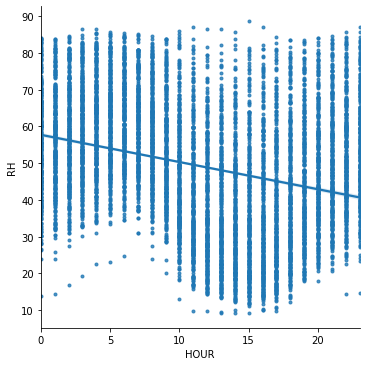

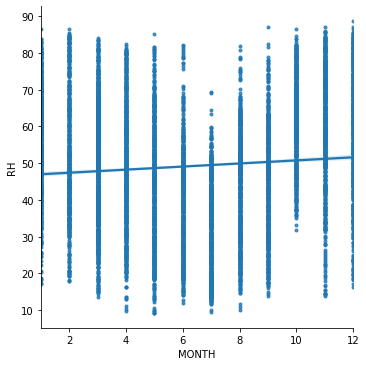

In [ ]:
#plot all X-features against the Relative Humidity to find out relationship among them
col_=df.columns.tolist()[2:]
for i in df.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=df,markers='.')